# Dependencies

In [2]:
pacman::p_load(ggplot2,  immunarch, randomcoloR, cowplot, factoextra, ggbeeswarm)

# Functions

In [3]:
source("/Users/anabbi/git/ped_CapTCRseq/R/Immune_diversity.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")

In [4]:
pca_vusage.fx <- function(dta, sampleprocessingdta, sampletype, ell){
    
    #subset to PBMC samples
    dta_subset <- repFilter(dta, .method = "by.meta", .query = list(sampletype = include(sampletype)))
    
    dta_subset$meta <- cbind(dta_subset$meta, sampleprocessingdta[ match( dta_subset$meta$sample_id, 
                                                                  sampleprocessingdta$mysample_id),])
    dta_subset_gu <- as.data.frame(geneUsage(dta_subset$data, "hs.trbv", .norm = T, .quant = "count"))
    rownames(dta_subset_gu) <- dta_subset_gu$Names
dta_subset_gu$Names <- NULL
    dta_subset_gu[is.na(dta_subset_gu)] <- 0
    res.pca <- prcomp(t(dta_subset_gu), scale. = TRUE, center = TRUE)
    p1 <- fviz_eig(res.pca)
    p2 <- fviz_pca_var(res.pca, col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)
    groups <- as.factor(dta_subset$meta$libbatch)
    myColors <- distinctColorPalette(length(levels(groups)))
    names(myColors) <- levels(groups)
    p3 <- fviz_pca_ind(res.pca,geom = "point", pointshape = 16, pointsize = 1,alpha = 0.7,
                       col.ind = groups, 
                       addEllipses = ell, ellipse.alpha = 0, invisible="quali",
                       title = "Library batch") + 
    theme(legend.position = "none") + scale_color_manual(values = myColors)
    
    groups <- as.factor(dta_subset$meta$capbatch)
    myColors <- distinctColorPalette(length(levels(groups)))
    names(myColors) <- levels(groups)
    p4 <- fviz_pca_ind(res.pca,geom = "point", pointshape = 16, pointsize = 1, alpha = 0.7,
                       col.ind = groups, 
                       addEllipses = ell, ellipse.alpha = 0, invisible="quali",
                       title = "Capture batch") + 
    theme(legend.position = "none") + scale_color_manual(values = myColors)
    
    return(plot_grid(p1,p2,p3,p4))
}

In [5]:
pca_batch.fx <- function(dta, sampleprocessingdta, sampletype, ell){
    
    meta <- repFilter(dta, .method = "by.meta", .query = list(sampletype = include("PBMC")))$meta
    
    sampleprocessingdta <- sampleprocessingdta[ which(sampleprocessingdta$TCR == "Yes"),]

    meta <- cbind(meta, sampleprocessingdta[ match( meta$sample_id, sampleprocessingdta$mysample_id),])
    
    meta <- meta[!is.na(meta$TCR),]
    
    meta_subset <- meta[, c("TRB", "Reads", "observed_Shannon",
                            "q0_v", "q0_j", "DNAextracted", "DNAused", "libraryyield", "captureyield")]

    rownames(meta_subset) <- meta$sample_id
    
    mypca <- prcomp(meta_subset, scale. = TRUE, center = TRUE)
    
    p1 <-  fviz_eig(mypca)
    
    p2 <- fviz_pca_var(mypca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)
    
    groups <- as.factor(meta$libbatch)
    myColors <- distinctColorPalette(length(levels(groups)))
    names(myColors) <- levels(groups)

p3 <- fviz_pca_ind(mypca, geom = "point", pointshape = 16, pointsize = 1,
                   col.ind = groups, alpha = 0.7,
                   addEllipses = ell, ellipse.alpha = 0, invisible="quali",
                   title = "Library batch") + theme(legend.position = "none") +
    scale_color_manual(values = myColors)
    
    groups <- as.factor(meta$capbatch)
    myColors <- distinctColorPalette(length(levels(groups)))
    names(myColors) <- levels(groups)

p4 <- fviz_pca_ind(mypca, geom = "point", pointshape = 16, pointsize = 1,
                   col.ind = groups, alpha = 0.7, 
                   addEllipses = ell, ellipse.alpha = 0, invisible="quali",
                   title = "Capture batch") + theme(legend.position = "none") +
    scale_color_manual(values = myColors)
    
    return(plot_grid(p1,p2,p3,p4))
    
}

# Paths

In [6]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"

gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

# Main

# PBMC

In [7]:
load(file = paste0(gitpath, "data/pbmc_sampleprocessing.RData"))

In [8]:
load(file = paste0(datapath,"capTCRseq/meta_div_TRB.RData"))

Warning message in load(file = paste0(datapath, "capTCRseq/meta_div_TRB.RData")):
"strings not representable in native encoding will be translated to UTF-8"


In [9]:
pbmc_samples$sample_id <- NULL

In [10]:
ls()

[1] "Divstats.fx"            "addjurkat.fx"           "datapath"              
 [4] "gitpath"                "histdenp"               "histp"                 
 [7] "immunelist_adaptive.fx" "immunelistfx"           "manifestpath"          
[10] "message_parallel"       "meta_div"               "myaxis"                
[13] "myplot"                 "pbmc_samples"           "pca_batch.fx"          
[16] "pca_vusage.fx"          "plotpath"               "safe_mclapply"         
[19] "text_matrix"

In [11]:
colnames(meta_div)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "Pass"              
[10] "CD3"                "EM"                 "CM"                
[13] "Na<U+00EF>ve"       "SCM"                "TE"                
[16] "EM."                "CM."                "Na<U+00EF>ve."     
[19] "SCM."               "TE."                "Na<U+00EF>ve.TE"   
[22] "N.CM.SCM.TE.EM"     "PD.1"               "PDL1"              
[25] "LAG3"               "TIM3"               "CTLA4"             
[28] "PD1."               "PDL1."              "LAG3."             
[31] "TIM3."              "CTLA4."             "Any.NCR"           
[34] "PD1...LAG3...TIM3"  "cancergroup"        "TRB"               
[37] "Reads"              "CPKR"               "Average_reads"     
[40] "VMR"                "Max_reads"          "Singletons"        
[43] "Doubletons"         "qD"                 "Sample_Coverage"   
[46] "observed_Richness"  "estimated_Richness" "SE_Richeness"      
[49] "observed_Shannon"   "estimated_Shannon"  "SE_Shannon"        
[52] "observed_Simpson"   "estimated_Simpson"  "SE_Simpson"        
[55] "file"               "basename"           "Group"             
[58] "sampletype"

In [12]:
table(meta_div$sampletype)


 PBMC Tumor cfDNA 
  281    18   286 

In [13]:
all <- merge(pbmc_samples, meta_div[ which(meta_div$sampletype == "PBMC"),], by.x = "mysample_id", by.y = "sample_id")

# divstats_lst_TRB contains all samples with flow data, remove those without tcr data
all <- all[!is.na(all$basename),]

In [18]:
pbmc_samples[ grepl("LFS", pbmc_samples$mysample_id),]

Shipped,DNAextracted,DNAused,libbatch,librarypassed,Library preparation,libraryyield,captureyield,capbatch,capturepassed,Successful capture,deepseq,Deep sequencing,mysample_id,TCR,TCR analysis,Patient,Tumor,Group
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>


In [126]:
stats <- read.csv(file = paste0(datapath, "capTCRseq/align_stats.csv"), header = T)

In [127]:
stats$basename <- gsub("_barcode.*", "",stats$Input.file.s.)

In [128]:
all_stats <- merge(all, stats, by = "basename")

In [129]:
dim(all)

[1] 270  76

In [130]:
dim(all_stats)

[1] 270  94

In [131]:
all_stats$percaligned <- all_stats$Successfully.aligned.reads/all_stats$Total.sequencing.reads

In [132]:
summary(all_stats$percaligned)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6187  0.7310  0.7616  0.7809  0.8413  0.9781 

In [133]:
summary(all_stats$Total.sequencing.reads)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   95776  3041584  5244620  5846903  6851336 78168018 

In [134]:
summary(all_stats$Successfully.aligned.reads)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   71989  2291609  4107275  4610961  5403682 59997822 

In [135]:
p1 <- histdenp(all_stats, "Total.sequencing.reads/1000000", 1)
p2 <- histdenp(all_stats, "Successfully.aligned.reads/1000000", 1)
p3 <- histdenp(all_stats, "percaligned", 0.01)

In [136]:
p4 <- histdenp(all_stats, "TRB", 20)
p5 <- histdenp(all_stats, "Reads/100", 100)

In [137]:
p00 <- histdenp(all_stats, "DNAused", 30)

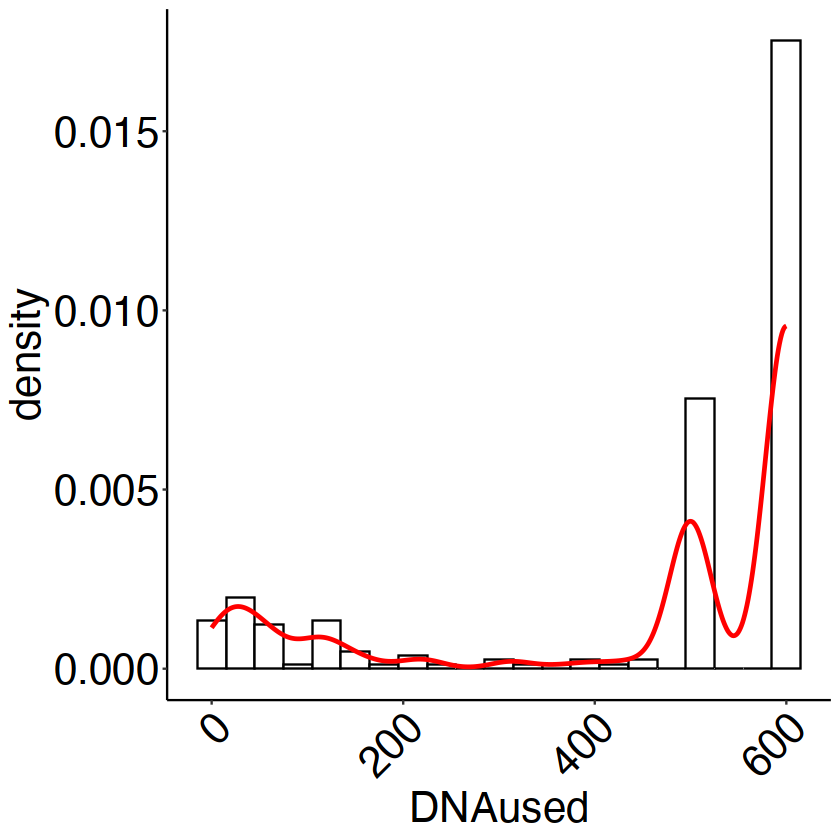

In [138]:
p00

In [139]:
p6 <- ggplot(data = all_stats, aes( x = DNAused, y = TRB)) + geom_point() + myplot + myaxis
p7 <- ggplot(data = all_stats, aes( x = libraryyield, y = TRB)) + geom_point() + myplot + myaxis
p8 <- ggplot(data = all_stats, aes( x = captureyield, y = TRB)) + geom_point() + myplot + myaxis

In [140]:
p9 <- ggplot(data = all_stats, aes( x = Total.sequencing.reads/1000000, y = TRB)) + geom_point() + myplot + myaxis
p10 <- ggplot(data = all_stats, aes( x = Successfully.aligned.reads/1000000, y = TRB)) + geom_point() + myplot + myaxis
p11 <- ggplot(data = all_stats, aes( x = percaligned, y = TRB)) + geom_point() + myplot + myaxis

In [141]:
p12 <- ggplot(data = all_stats, aes( x = capbatch, y = TRB)) + geom_boxplot() +geom_beeswarm(cex = 0.1)+ myplot + myaxis +
theme( axis.text.x = element_blank())
p13 <- ggplot(data = all_stats, aes( x = libbatch, y = TRB)) + geom_boxplot() +geom_beeswarm(cex = 0.5) + myplot + myaxis +
theme( axis.text.x = element_blank())

In [142]:
pdf(paste0(plotpath, "QC_PBMC.pdf"),
    width = 30, height = 30)
plot_grid(p1,p2, p3, p4, p5,
          p6,p7,p8,p9,p10,
          p11,p12,p13,
          ncol = 3)
dev.off()

pdf 
  2

In [1]:
head(all_stats)

ERROR: Error in head(all_stats): object 'all_stats' not found


In [143]:
summary(all_stats$Total.sequencing.reads)
summary(all_stats$Successfully.aligned.reads)
summary(all_stats$libraryyield)
summary(all_stats$captureyield)
summary(all_stats$percaligned)
summary(all_stats$TRB)
summary(all_stats$Reads)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   95776  3041584  5244620  5846903  6851336 78168018 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   71989  2291609  4107275  4610961  5403682 59997822 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   12.0   450.7   741.6   990.0  1238.4  8112.0 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   4.294   74.860  159.980  285.178  340.575 1311.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6187  0.7310  0.7616  0.7809  0.8413  0.9781 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    45.5   126.5   245.0   351.0  2237.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     10    1128    3490   32799   33156  363060 

## PCA V usage

In [144]:
load(file = paste0(datapath, "capTCRseq/int_load_meta.RData"))

Warning message in load(file = paste0(datapath, "capTCRseq/int_load_meta.RData")):
"strings not representable in native encoding will be translated to UTF-8"


In [145]:
pbmc_pca <- pca_vusage.fx(int_load, pbmc_samples, "PBMC", "FALSE")

Warning message in eval(e, x, parent.frame()):
"unable to translate 'Na<U+00EF>ve' to native encoding"
Warning message in eval(e, x, parent.frame()):
"unable to translate 'Na<U+00EF>ve.' to native encoding"
Warning message in eval(e, x, parent.frame()):
"unable to translate 'Na<U+00EF>ve.TE' to native encoding"


Warning message:
"ggrepel: 60 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


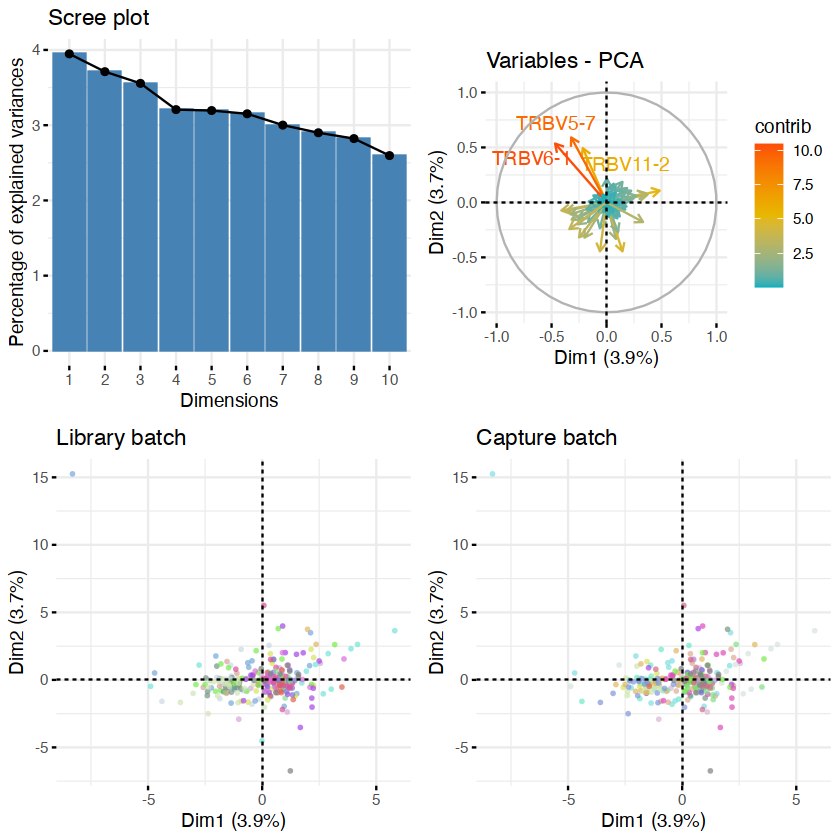

In [146]:
pbmc_pca

In [147]:
pdf(paste0(plotpath, "PBMC_Vusage_PCA.pdf"),
    width = 10, height = 10)
pbmc_pca
dev.off()

Warning message:
"ggrepel: 56 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


pdf 
  2

## PCA experimental measures

In [148]:
pca_batch <- pca_batch.fx(int_load, pbmc_samples, "PBMC", "FALSE")

Warning message in eval(e, x, parent.frame()):
"unable to translate 'Na<U+00EF>ve' to native encoding"
Warning message in eval(e, x, parent.frame()):
"unable to translate 'Na<U+00EF>ve.' to native encoding"
Warning message in eval(e, x, parent.frame()):
"unable to translate 'Na<U+00EF>ve.TE' to native encoding"


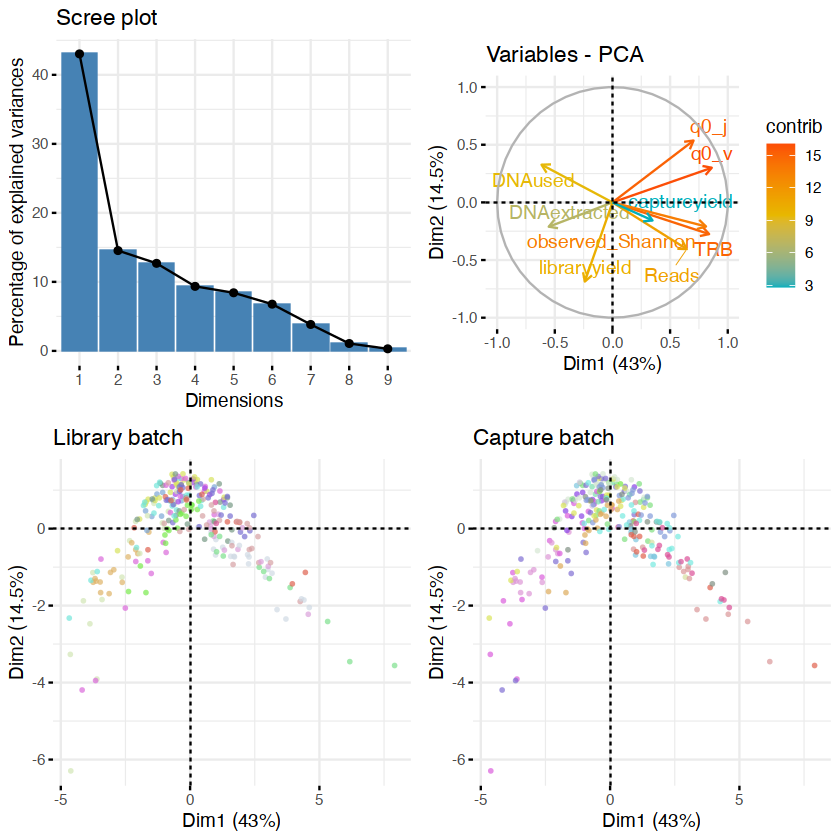

In [149]:
pca_batch

In [150]:
pdf(paste0(plotpath, "PBMC_batch_PCA.pdf"),
    width = 10, height = 10)
pca_batch
dev.off()

pdf 
  2

## Remove samples

In [151]:
summary(all_stats$Total.sequencing.reads)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   95776  3041584  5244620  5846903  6851336 78168018 

In [152]:
dim(all_stats)

[1] 270  95

In [153]:
# remove 22 samples with < 2mil reads
subset_pbmc <- all_stats[all_stats$Total.sequencing.reads > 2000000,]

In [154]:
dim(subset_pbmc)

[1] 248  95

In [155]:
#remove 10 samples with < 70% reads aligned
subset_pbmc <- subset_pbmc[subset_pbmc$percaligned >= 0.7,]

In [156]:
save(subset_pbmc, file = paste0(datapath, "capTCRseq/PBMC_GoodSamples.RData"))

In [157]:
dim(subset_pbmc)

[1] 238  95

In [158]:
summary(subset_pbmc$TRB)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.0    56.5   152.5   264.3   367.0  2237.0 

In [159]:
stats[ grepl("CHP-411-02-PBMC-DNA", stats$Input.file.s.),]

,Input.file.s.,Output.file.s.,Version,Total.sequencing.reads,Successfully.aligned.reads,Alignment.failed..no.hits..not.TCR.IG..,Alignment.failed.because.of.absence.of.CDR3.parts,Alignment.failed.because.of.low.total.score,Alignment.aided.overlaps,TRA.chains,TRB.chains,TRD.chains,TRG.chains,TRA.TRD.chains,IGH.chains,IGK.chains,IGL.chains,chains,basename
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
300,"CHP-411-02-PBMC-DNA_barcode_R1.fastq,CHP-411-02-PBMC-DNA_barcode_R2.fastq",/cluster/projects/pughlab/projects/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/alignments/alignments_CHP-411-02-PBMC-DNA.vdjca,"2.1.12,repseqio.v1.5",2490276,2272392,69658,26425,121801,49521,940026,242188,17601,415881,656693,0,0,0,0,CHP-411-02-PBMC-DNA


In [160]:
stats[ grepl("CHP_385-03-PBMC", stats$Input.file.s.),]

,Input.file.s.,Output.file.s.,Version,Total.sequencing.reads,Successfully.aligned.reads,Alignment.failed..no.hits..not.TCR.IG..,Alignment.failed.because.of.absence.of.CDR3.parts,Alignment.failed.because.of.low.total.score,Alignment.aided.overlaps,TRA.chains,TRB.chains,TRD.chains,TRG.chains,TRA.TRD.chains,IGH.chains,IGK.chains,IGL.chains,chains,basename
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
387,"CHP_385-03-PBMC-DNA_barcode_R1.fastq,CHP_385-03-PBMC-DNA_barcode_R2.fastq",/cluster/projects/pughlab/projects/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/alignments/alignments_CHP_385-03-PBMC-DNA.vdjca,"2.1.12,repseqio.v1.5",5934469,4308810,487066,98114,1040479,65612,3262934,402731,165232,266952,210700,149,101,11,0,CHP_385-03-PBMC-DNA


In [161]:
dim(all)
dim(all_stats)

[1] 270  76

[1] 270  95

# cfDNA

In [163]:
load(file = paste0(gitpath, "data/cfdna_sampleprocessing.RData"))

In [164]:
load(file = paste0(datapath,"capTCRseq/meta_div_TRB.RData"))

Warning message in load(file = paste0(datapath, "capTCRseq/meta_div_TRB.RData")):
"strings not representable in native encoding will be translated to UTF-8"


In [165]:
cfdna_samples$sample_id <- NULL

In [166]:
all <- merge(cfdna_samples, meta_div[ which(meta_div$sampletype == "cfDNA"),], by.x = "mysample_id", by.y = "sample_id")

# divstats_lst_TRB contains all samples with flow data, remove those without tcr data
all <- all[!is.na(all$basename),]

In [167]:
dim(all)

[1] 286  77

In [168]:
stats <- read.csv(file = paste0(datapath, "capTCRseq/align_stats.csv"), header = T)

In [169]:
stats$basename <- gsub("_barcode.*", "",stats$Input.file.s.)

In [170]:
all_stats <- merge(all, stats, by = "basename")

In [171]:
dim(all)

[1] 286  77

In [172]:
dim(all_stats)

[1] 286  95

In [176]:
all_stats$percaligned <- all_stats$Successfully.aligned.reads/all_stats$Total.sequencing.reads

In [177]:
summary(all_stats$percaligned)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6693  0.8203  0.8660  0.8380  0.8806  0.9278 

In [178]:
summary(all_stats$Total.sequencing.reads)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   22839  3909173  4880550  5747415  6625276 18558893 

In [179]:
summary(all_stats$Successfully.aligned.reads)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   20740  3148315  4193616  4877297  5820301 16382810 

In [180]:
p1 <- histdenp(all_stats, "Total.sequencing.reads/1000000", 1)
p2 <- histdenp(all_stats, "Successfully.aligned.reads/1000000", 1)
p3 <- histdenp(all_stats, "percaligned", 0.01)

In [181]:
p4 <- histdenp(all_stats, "TRB", 5)
p5 <- histdenp(all_stats, "Reads/100", 5)

In [182]:
p6 <- ggplot(data = all_stats, aes( x = DNAused, y = TRB)) + geom_point() + myplot + myaxis
p7 <- ggplot(data = all_stats, aes( x = libraryyield, y = TRB)) + geom_point() + myplot + myaxis
p8 <- ggplot(data = all_stats, aes( x = captureyield, y = TRB)) + geom_point() + myplot + myaxis

In [183]:
p9 <- ggplot(data = all_stats, aes( x = Total.sequencing.reads/1000000, y = TRB)) + geom_point() + myplot + myaxis
p10 <- ggplot(data = all_stats, aes( x = Successfully.aligned.reads/1000000, y = TRB)) + geom_point() + myplot + myaxis
p11 <- ggplot(data = all_stats, aes( x = percaligned, y = TRB)) + geom_point() + myplot + myaxis

In [184]:
p12 <- ggplot(data = all_stats, aes( x = capbatch, y = TRB)) + geom_boxplot() +geom_beeswarm(cex = 0.1)+ myplot + myaxis +
theme( axis.text.x = element_blank())
p13 <- ggplot(data = all_stats, aes( x = libbatch, y = TRB)) + geom_boxplot() +geom_beeswarm(cex = 0.5) + myplot + myaxis +
theme( axis.text.x = element_blank())

In [185]:
pdf(paste0(plotpath, "QC_cfDNA.pdf"),
    width = 30, height = 30)
plot_grid(p1,p2, p3, p4, p5, p6,p7,p8,p9,p10, p11,p12,p13, ncol = 3)
dev.off()

Warning message:
"Removed 8 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 8 rows containing non-finite values (`stat_density()`)."
Warning message:
"Removed 8 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 8 rows containing non-finite values (`stat_density()`)."
Warning message:
"Removed 8 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 8 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 9 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 8 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 8 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 8 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 8 rows containing non-finite values (`stat_boxplot()`)."
Warning message:
"Removed 8 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 8 rows containing non

pdf 
  2

In [186]:
summary(all_stats$Total.sequencing.reads)
summary(all_stats$Successfully.aligned.reads)
summary(all_stats$libraryyield)
summary(all_stats$captureyield)
summary(all_stats$percaligned)
summary(all_stats$TRB)
summary(all_stats$Reads)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   22839  3909173  4880550  5747415  6625276 18558893 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   20740  3148315  4193616  4877297  5820301 16382810 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  30.82  200.88  324.48  349.22  456.24 1017.60 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  104.5   342.0   585.2   628.4   855.0  1641.6       1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6693  0.8203  0.8660  0.8380  0.8806  0.9278 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.00    3.00    7.00   13.98   16.00  220.00       8 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1     354    2964    6537    7882   88874       8 

## PCA V usage

In [187]:
load(file = paste0(gitpath, "data/cfdna_sampleprocessing.RData"))

In [188]:
load(file = paste0(datapath, "capTCRseq/int_load_meta.RData"))

Warning message in load(file = paste0(datapath, "capTCRseq/int_load_meta.RData")):
"strings not representable in native encoding will be translated to UTF-8"


In [189]:
cfdna_pca <- pca_vusage.fx(int_load, cfdna_samples, "cfDNA", "FALSE")

Warning message in eval(e, x, parent.frame()):
"unable to translate 'Na<U+00EF>ve' to native encoding"
Warning message in eval(e, x, parent.frame()):
"unable to translate 'Na<U+00EF>ve.' to native encoding"
Warning message in eval(e, x, parent.frame()):
"unable to translate 'Na<U+00EF>ve.TE' to native encoding"


Warning message:
"ggrepel: 57 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


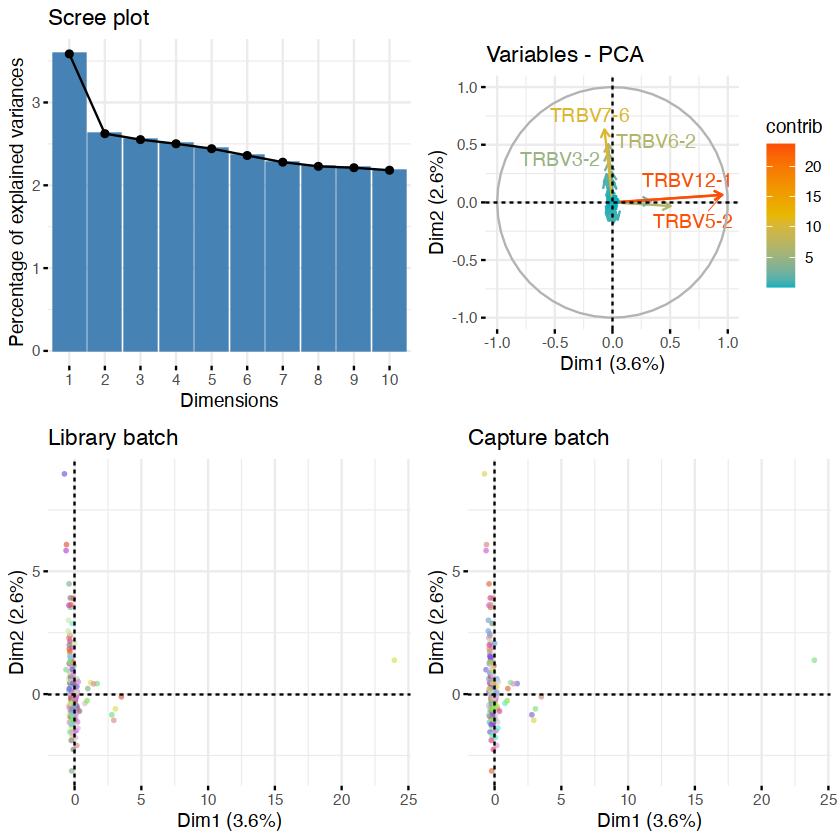

In [190]:
cfdna_pca

In [191]:
pdf(paste0(plotpath, "cfDNA_Vusage_PCA.pdf"),
    width = 10, height = 10)
cfdna_pca
dev.off()

Warning message:
"ggrepel: 56 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


pdf 
  2

In [192]:
head(int_load$meta)

Sample,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,Pass,...,q0_aa,q0_v,q0_j,q0_aav,q0_vj,q1_aa,q1_v,q1_j,q1_aav,q1_vj
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_10YO-M_PBMC_DNA,CHP_10YO_M_00,CHP_10YO_M,X00,NA,NA,NA,Normal,NA,NA,...,22,16,8,22,12.0,12.787814,9.563643,5.074581,12.787814,7.319112
CHP_11YO-M_PBMC_DNA,CHP_11YO_M_00,CHP_11YO_M,X00,NA,NA,NA,Normal,NA,NA,...,21,15,11,21,13.0,14.411620,11.695680,8.890122,14.411620,10.292901
CHP_15YO-F-A_PBMC_DNA,CHP_15YO_F_A_00,CHP_15YO_F_A,X00,NA,NA,NA,Normal,NA,NA,...,13,12,8,13,10.0,10.930258,9.683620,6.059679,10.930258,7.871649
CHP_15YO-F-B_PBMC_DNA,CHP_15YO_F_B_00,CHP_15YO_F_B,X00,NA,NA,NA,Normal,NA,NA,...,9,8,7,9,7.5,8.294830,6.692670,6.084720,8.294830,6.388695
CHP_15YO-M_PBMC_DNA,CHP_15YO_M_00,CHP_15YO_M,X00,NA,NA,NA,Normal,NA,NA,...,33,22,10,33,16.0,29.070103,20.127211,7.641330,29.070103,13.884271
CHP_16YO-M_PBMC_DNA,CHP_16YO_M_00,CHP_16YO_M,X00,NA,NA,NA,Normal,NA,NA,...,7,6,6,7,6.0,5.495512,5.434412,4.355165,5.495512,4.894789


In [193]:
temp <- repFilter(int_load, .method = "by.meta", .query = list(Sample = exclude("CHP_374-05-cfDNA")))

Warning message in eval(e, x, parent.frame()):
"unable to translate 'Na<U+00EF>ve' to native encoding"
Warning message in eval(e, x, parent.frame()):
"unable to translate 'Na<U+00EF>ve.' to native encoding"
Warning message in eval(e, x, parent.frame()):
"unable to translate 'Na<U+00EF>ve.TE' to native encoding"


In [194]:
cfdna_pca <- pca_vusage.fx(temp, cfdna_samples, "cfDNA", "FALSE")

Warning message in eval(e, x, parent.frame()):
"unable to translate 'Na<U+00EF>ve' to native encoding"
Warning message in eval(e, x, parent.frame()):
"unable to translate 'Na<U+00EF>ve.' to native encoding"
Warning message in eval(e, x, parent.frame()):
"unable to translate 'Na<U+00EF>ve.TE' to native encoding"


Warning message:
"ggrepel: 59 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


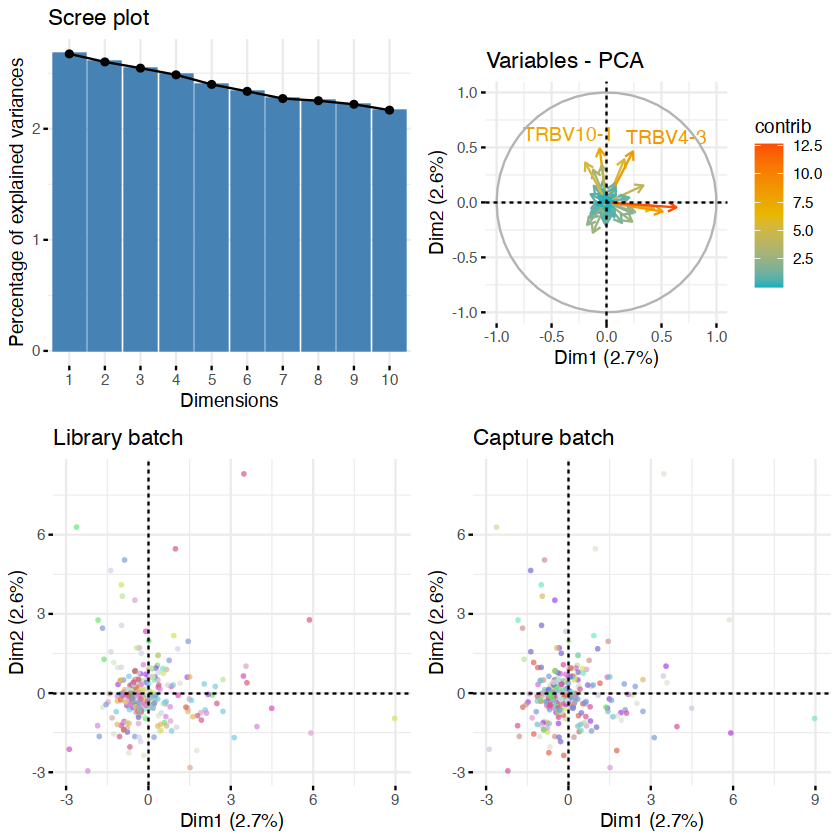

In [195]:
cfdna_pca

## PCA experimental measures

In [196]:
pca_batch <- pca_batch.fx(int_load, cfdna_samples, "cfDNA", "FALSE")

Warning message in eval(e, x, parent.frame()):
"unable to translate 'Na<U+00EF>ve' to native encoding"
Warning message in eval(e, x, parent.frame()):
"unable to translate 'Na<U+00EF>ve.' to native encoding"
Warning message in eval(e, x, parent.frame()):
"unable to translate 'Na<U+00EF>ve.TE' to native encoding"


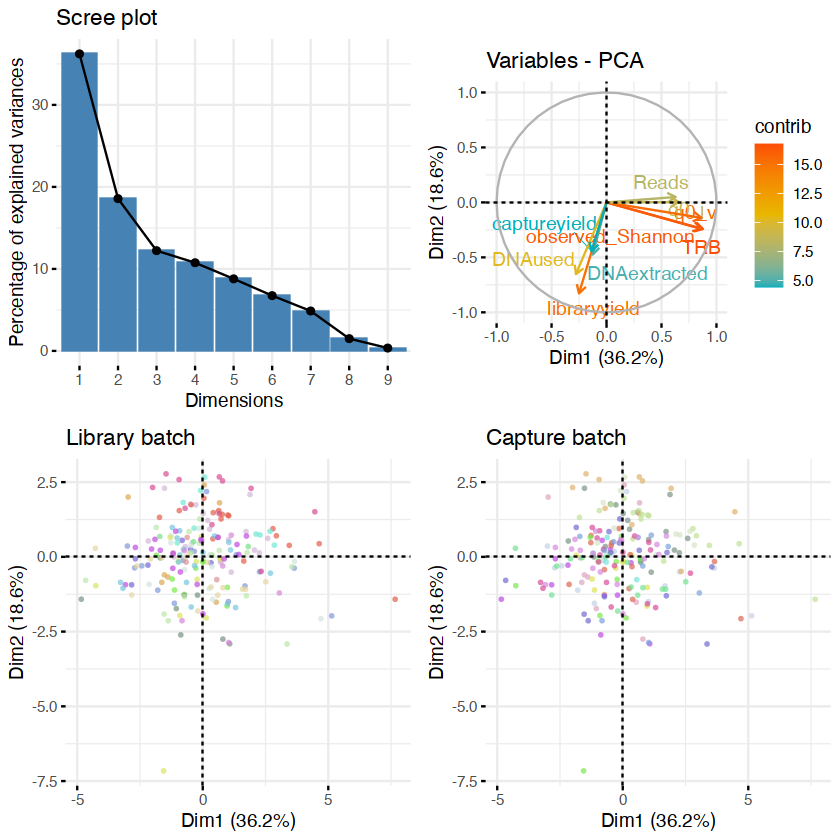

In [197]:
pca_batch

In [198]:
pdf(paste0(plotpath, "cfDNA_batch_PCA.pdf"),
    width = 10, height = 10)
pca_batch
dev.off()

pdf 
  2

## Remove samples

In [199]:
summary(all_stats$Total.sequencing.reads)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   22839  3909173  4880550  5747415  6625276 18558893 

In [200]:
summary(all_stats$percaligned)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6693  0.8203  0.8660  0.8380  0.8806  0.9278 

In [201]:
# remove 20 samples with < 3mil reads
subset_cfdna <- all_stats[all_stats$Total.sequencing.reads > 3000000,]

In [202]:
#remove 4 samples with < 70% reads aligned
subset_cfdna <- subset_cfdna[subset_cfdna$percaligned >= 0.7,]

In [203]:
dim(subset_cfdna)

[1] 261  96

In [204]:
#identify the one outlier from V usage

In [206]:
dta <- repFilter(int_load, .method = "by.meta", .query = list(sampletype = include("cfDNA")))
dta$meta <- cbind(dta$meta, cfdna_samples[match(dta$meta$sample_id, cfdna_samples$mysample_id), ])
dta_gu <- as.data.frame(geneUsage(dta$data, "hs.trbv", .norm = T, .quant = "count"))
rownames(dta_gu) <- dta_gu$Names
dta_gu$Names <- NULL
dta_gu[is.na(dta_gu)] <- 0
res.pca <- prcomp(t(dta_gu), scale. = TRUE, center = TRUE)

Warning message in eval(e, x, parent.frame()):
"unable to translate 'Na<U+00EF>ve' to native encoding"
Warning message in eval(e, x, parent.frame()):
"unable to translate 'Na<U+00EF>ve.' to native encoding"
Warning message in eval(e, x, parent.frame()):
"unable to translate 'Na<U+00EF>ve.TE' to native encoding"


In [207]:
ind <- get_pca_ind(res.pca)

In [209]:
#CHP_374-05-cfDNA is already removed because total reads < 3mil. It is an EWS case with one TRB and 3 reads.

In [210]:
save(subset_cfdna, file = paste0(datapath, "capTCRseq/cfDNA_GoodSamples.RData"))